In [2]:
import numpy as np
from scipy.interpolate import make_interp_spline

x  = np.linspace(0, 10, 8)
y  = np.sin(x)                 # sample data
spl = make_interp_spline(x, y, k=3)
xg  = np.linspace(0, 10, 200)
yg  = spl(xg)                  # evaluate


In [4]:
xg.shape

(200,)

In [5]:
from scipy.interpolate import BSpline


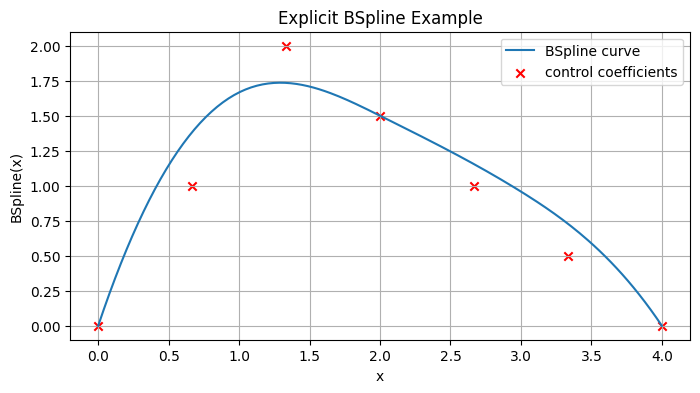

In [8]:

# Create a cubic B-spline from explicit knots and control-point coefficients
knot_vector = np.array([0, 0, 0, 0, 1, 2, 3, 4, 4, 4, 4])  # clamped at ends
coefficients = np.array([0.0, 1.0, 2.0, 1.5, 1.0, 0.5, 0.0])
degree = 3

bspline = BSpline(knot_vector, coefficients, degree)

x_eval = np.linspace(0, 4, 200)
y_eval = bspline(x_eval)

plt.figure(figsize=(8, 4))
plt.plot(x_eval, y_eval, label="BSpline curve")
plt.scatter(np.linspace(0, 4, len(coefficients)), coefficients, color="red", marker="x", label="control coefficients")
plt.title("Explicit BSpline Example")
plt.xlabel("x")
plt.ylabel("BSpline(x)")
plt.legend()
plt.grid(True)
plt.show()


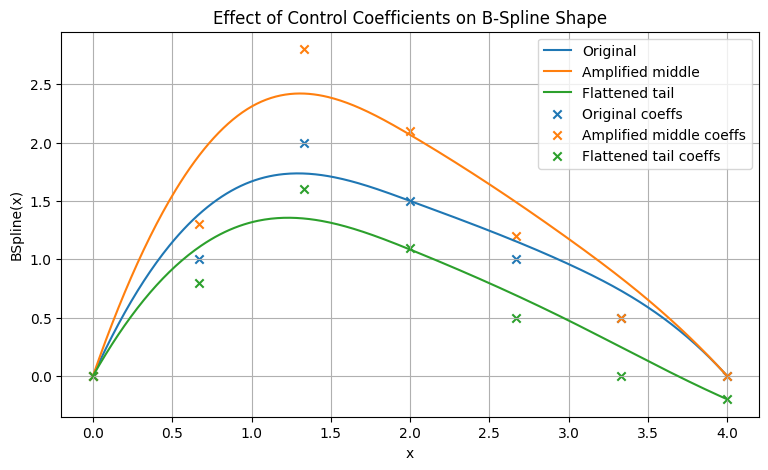

In [10]:
# Compare different control coefficients with the same knot vector
base_knot_vector = np.array([0, 0, 0, 0, 1, 2, 3, 4, 4, 4, 4])
coefficient_sets = {
    "Original": coefficients,
    "Amplified middle": coefficients + np.array([0, 0.3, 0.8, 0.6, 0.2, 0, 0]),
    "Flattened tail": coefficients - np.array([0, 0.2, 0.4, 0.4, 0.5, 0.5, 0.2]),
}

plt.figure(figsize=(9, 5))
for label, coeffs in coefficient_sets.items():
    bs = BSpline(base_knot_vector, coeffs, degree)
    plt.plot(x_eval, bs(x_eval), label=label)

for label, coeffs in coefficient_sets.items():
    plt.scatter(np.linspace(0, 4, len(coeffs)), coeffs, marker="x", label=f"{label} coeffs")

plt.title("Effect of Control Coefficients on B-Spline Shape")
plt.xlabel("x")
plt.ylabel("BSpline(x)")
plt.legend()
plt.grid(True)
plt.show()


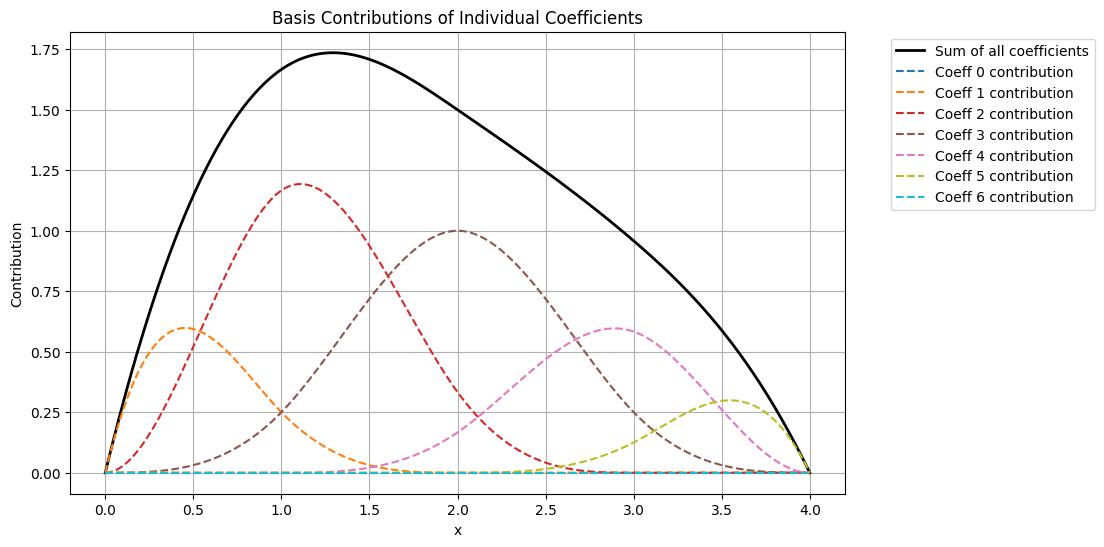

In [11]:
# Visualize individual basis-function contributions from each coefficient
bspline = BSpline(base_knot_vector, coefficients, degree)
y_total = bspline(x_eval)

basis_contributions = []
for i in range(len(coefficients)):
    coeffs = np.zeros_like(coefficients)
    coeffs[i] = coefficients[i]
    basis = BSpline(base_knot_vector, coeffs, degree)
    basis_contributions.append(basis(x_eval))

plt.figure(figsize=(10, 6))
plt.plot(x_eval, y_total, color="black", linewidth=2, label="Sum of all coefficients")
colors = plt.cm.tab10(np.linspace(0, 1, len(coefficients)))
for i, contrib in enumerate(basis_contributions):
    plt.plot(x_eval, contrib, color=colors[i], linestyle="--", label=f"Coeff {i} contribution")

plt.title("Basis Contributions of Individual Coefficients")
plt.xlabel("x")
plt.ylabel("Contribution")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()


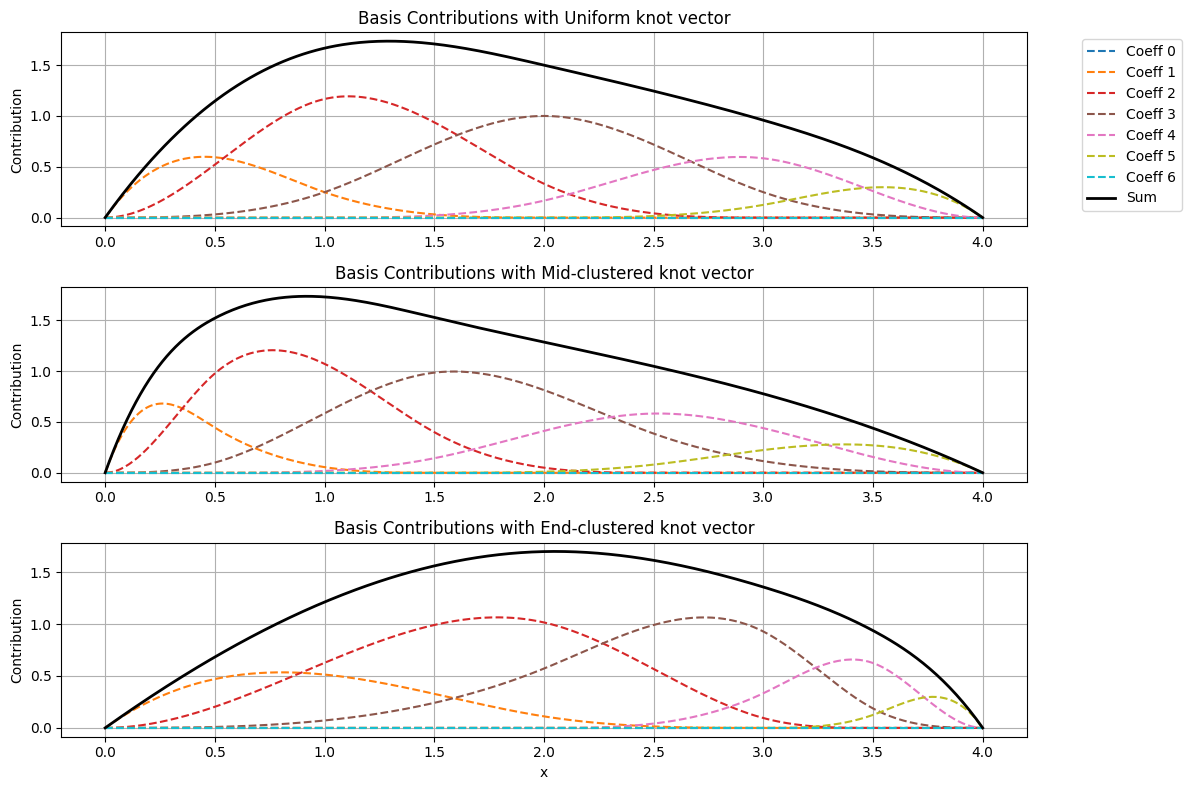

In [12]:
# Examine how different knot vectors reshape individual basis contributions
plt.figure(figsize=(12, 8))

for idx, (label, kv) in enumerate(knot_vectors.items(), start=1):
    plt.subplot(len(knot_vectors), 1, idx)
    total = BSpline(kv, coefficients, degree)(x_eval)
    colors = plt.cm.tab10(np.linspace(0, 1, len(coefficients)))
    for i in range(len(coefficients)):
        coeffs = np.zeros_like(coefficients)
        coeffs[i] = coefficients[i]
        contrib = BSpline(kv, coeffs, degree)(x_eval)
        plt.plot(x_eval, contrib, color=colors[i], linestyle="--", label=f"Coeff {i}")
    plt.plot(x_eval, total, color="black", linewidth=2, label="Sum")
    plt.title(f"Basis Contributions with {label} knot vector")
    if idx == len(knot_vectors):
        plt.xlabel("x")
    plt.ylabel("Contribution")
    plt.grid(True)
    if idx == 1:
        plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


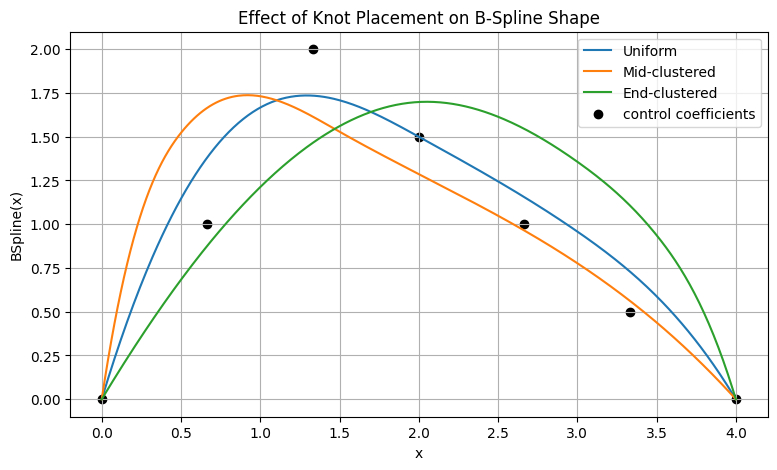

In [9]:
# Compare different knot vectors using the same control points
knot_vectors = {
    "Uniform": np.array([0, 0, 0, 0, 1, 2, 3, 4, 4, 4, 4]),
    "Mid-clustered": np.array([0, 0, 0, 0, 0.5, 1.5, 2.5, 4, 4, 4, 4]),
    "End-clustered": np.array([0, 0, 0, 0, 2, 3, 3.5, 4, 4, 4, 4]),
}

x_eval = np.linspace(0, 4, 400)

plt.figure(figsize=(9, 5))
for label, kv in knot_vectors.items():
    bs = BSpline(kv, coefficients, degree)
    plt.plot(x_eval, bs(x_eval), label=label)

plt.scatter(np.linspace(0, 4, len(coefficients)), coefficients, color="black", marker="o", label="control coefficients")
plt.title("Effect of Knot Placement on B-Spline Shape")
plt.xlabel("x")
plt.ylabel("BSpline(x)")
plt.legend()
plt.grid(True)
plt.show()


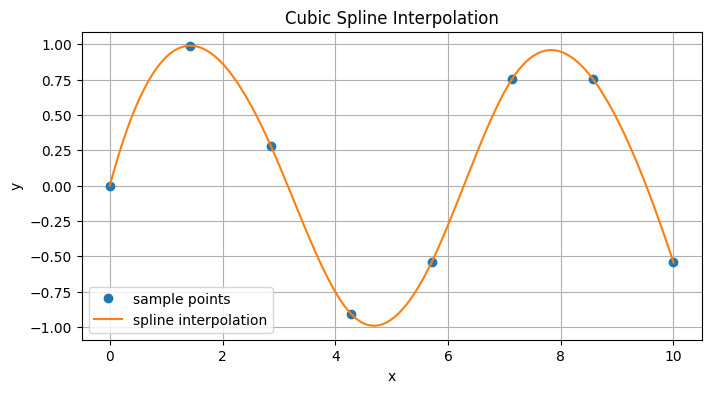

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(x, y, "o", label="sample points")
plt.plot(xg, yg, label="spline interpolation")
plt.title("Cubic Spline Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
